In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DDoS=pd.read_csv('/content/dataset_sdn.csv')

In [3]:
DDoS.Protocol.unique()
DDoS['Protocol'] = DDoS['Protocol'].replace('TCP', '0')
DDoS['Protocol'] = DDoS['Protocol'].replace('UDP', '1')
DDoS['Protocol'] = DDoS['Protocol'].replace('ICMP', '2')
DDoS.Protocol.unique()

array(['1', '0', '2'], dtype=object)

In [4]:
DDoS['src'] = DDoS['src'].replace('10.0.0.0', '0')
DDoS['src'] = DDoS['src'].replace('10.0.0.2', '1')
DDoS['src'] = DDoS['src'].replace('10.0.0.4', '2')
DDoS['src'] = DDoS['src'].replace('10.0.0.10', '3')
DDoS['src'] = DDoS['src'].replace('10.0.0.5', '4')
DDoS['src'] = DDoS['src'].replace('10.0.0.13', '5')
DDoS['src'] = DDoS['src'].replace('10.0.0.6', '6')
DDoS['src'] = DDoS['src'].replace('10.0.0.11', '7')
DDoS['src'] = DDoS['src'].replace('10.0.0.20', '8')
DDoS['src'] = DDoS['src'].replace('10.0.0.18', '9')
DDoS['src'] = DDoS['src'].replace('10.0.0.12', '10')
DDoS['src'] = DDoS['src'].replace('10.0.0.14', '11')
DDoS['src'] = DDoS['src'].replace('10.0.0.15', '12')
DDoS['src'] = DDoS['src'].replace('10.0.0.16', '13')
DDoS['src'] = DDoS['src'].replace('10.0.0.17', '14')
DDoS['src'] = DDoS['src'].replace('10.0.0.1', '15')
DDoS['src'] = DDoS['src'].replace('10.0.0.3', '16')
DDoS['src'] = DDoS['src'].replace('10.0.0.8', '17')
DDoS['src'] = DDoS['src'].replace('10.0.0.7', '18')
DDoS['src'] = DDoS['src'].replace('10.0.0.9', '19')
DDoS.src.unique()

array(['15', '1', '2', '3', '16', '4', '5', '6', '8', '7', '10', '9',
       '17', '18', '19', '11', '12', '13', '14'], dtype=object)

In [5]:
DDoS['dst'] = DDoS['dst'].replace('10.0.0.8', '0')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.7', '1')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.2', '2')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.4', '3')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '4')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.10', '5')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.3', '6')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.6', '7')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.5', '8')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.9', '9')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.12', '10')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.13', '11')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.14', '12')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.11', '13')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.16', '14')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.1', '15')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.15', '16')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.17', '17')
DDoS['dst'] = DDoS['dst'].replace('10.0.0.18', '18')
DDoS.dst.unique()

array(['0', '1', '6', '8', '5', '11', '15', '13', '2', '3', '9', '4',
       '12', '16', '10', '14', '17', '18'], dtype=object)

In [6]:
DDoS["rx_kbps"] = DDoS["rx_kbps"].fillna(DDoS["rx_kbps"].mean())

In [7]:
DDoS["tot_kbps"] = DDoS["tot_kbps"].fillna(DDoS["tot_kbps"].mean())

In [8]:
DDoS['label'].value_counts()

0    63561
1    40784
Name: label, dtype: int64

In [9]:
DDoS.groupby(["dt","src"]).label.count()

dt     src
2488   15      54
2518   15      56
       7      168
2548   1       56
       15      56
             ... 
42905  17       8
       18       8
       4       16
42935  17       8
       4        8
Name: label, Length: 3657, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X = DDoS[['src','dst','dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow','Protocol' ,'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps']]
y = DDoS['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Feature scaling (or standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
!pip install pytorch-tabnet

In [14]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

from sklearn.metrics import roc_auc_score, accuracy_score

In [15]:
# define the model
model= TabNetClassifier(optimizer_fn=torch.optim.Adam,n_d=8,n_a=8,n_steps=3,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax'
                      )

Device used : cpu


In [16]:
# fit the model 
model.fit(
    X_train,y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['auc','accuracy'],
    max_epochs=30 , patience=15,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)        

epoch 0  | loss: 0.17353 | train_auc: 0.99512 | train_accuracy: 0.96893 | valid_auc: 0.99492 | valid_accuracy: 0.96641 |  0:00:07s
epoch 1  | loss: 0.08647 | train_auc: 0.96953 | train_accuracy: 0.68115 | valid_auc: 0.96942 | valid_accuracy: 0.68734 |  0:00:15s
epoch 2  | loss: 0.07154 | train_auc: 0.99762 | train_accuracy: 0.97434 | valid_auc: 0.99743 | valid_accuracy: 0.97293 |  0:00:22s
epoch 3  | loss: 0.05524 | train_auc: 0.9907  | train_accuracy: 0.86313 | valid_auc: 0.99011 | valid_accuracy: 0.85859 |  0:00:29s
epoch 4  | loss: 0.0486  | train_auc: 0.99735 | train_accuracy: 0.96919 | valid_auc: 0.99727 | valid_accuracy: 0.96837 |  0:00:37s
epoch 5  | loss: 0.03763 | train_auc: 0.98961 | train_accuracy: 0.81202 | valid_auc: 0.98921 | valid_accuracy: 0.81408 |  0:00:46s
epoch 6  | loss: 0.04932 | train_auc: 0.99423 | train_accuracy: 0.84721 | valid_auc: 0.99359 | valid_accuracy: 0.84733 |  0:00:53s
epoch 7  | loss: 0.04139 | train_auc: 0.97306 | train_accuracy: 0.80616 | valid_auc

In [ ]:
# plot losses
plt.plot(model.history['loss'])
plt.title('TabNet Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TabNet Model loss.png')
plt.show()

In [ ]:
# plot accuracy
plt.plot(model.history['train_accuracy'])
plt.plot(model.history['valid_accuracy'])
plt.title('TabNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.savefig('TabNet Model Accuracy.png')
plt.show()

In [ ]:
# plot learning rates
plt.plot(model.history['lr'])

In [ ]:
# plot auc
plt.plot(model.history['train_auc'])
plt.plot(model.history['valid_auc'])

In [17]:
preds = model.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = model.predict_proba(X_test)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_test)

print(f"BEST VALID SCORE FOR {DDoS} : {model.best_cost}")
print(f"FINAL TEST SCORE FOR {DDoS} : {test_auc}")

BEST VALID SCORE FOR            dt  switch src dst  pktcount  bytecount  dur   dur_nsec  \
0       11425       1  15   0     45304   48294064  100  716000000   
1       11605       1  15   0    126395  134737070  280  734000000   
2       11425       1   1   0     90333   96294978  200  744000000   
3       11425       1   1   0     90333   96294978  200  744000000   
4       11425       1   1   0     90333   96294978  200  744000000   
...       ...     ...  ..  ..       ...        ...  ...        ...   
104340   5262       3   4   1        79       7742   81  842000000   
104341   5262       3   4   1        79       7742   81  842000000   
104342   5262       3   7   8        31       3038   31  805000000   
104343   5262       3   7   8        31       3038   31  805000000   
104344   5262       3   7   8        31       3038   31  805000000   

             tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no  \
0       1.010000e+11      3  ...      451         0         1   

In [18]:
# local explainability and masks
explain_matrix, masks = model.explain(X_test)

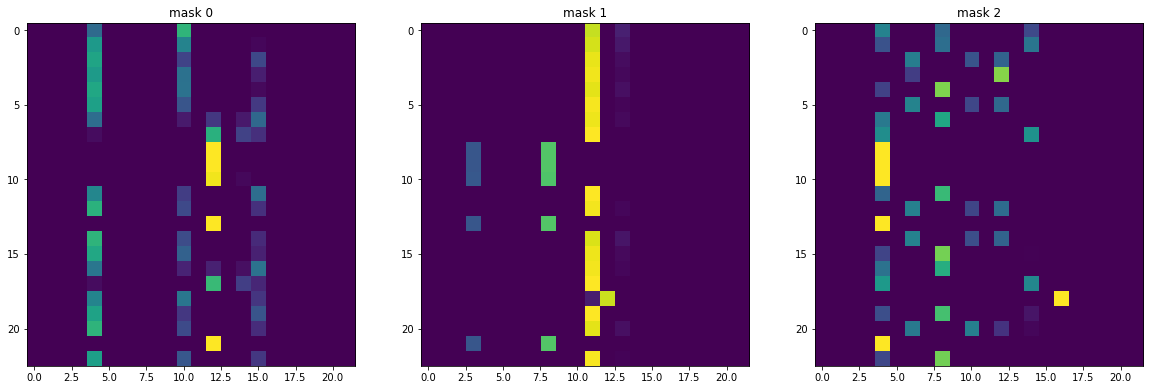

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:23])
    axs[i].set_title(f"mask {i}")

In [20]:
#prediction
y_pred = model.predict(X_test)

In [21]:
# determine best accuracy for test set
preds = model.predict(X_test)
test_acc = accuracy_score(preds, y_test)
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")

BEST ACCURACY SCORE ON TEST SET : 0.9900809813599118
